In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Desktop/Thinkful/house.csv')

In [3]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


Using this data, your task will be to predict the prices of the houses.

Target - SalePrice, features - SaleCondition, LotArea, Bedroom, 1stFlrSF, 2ndFlrSF

Text(0, 0.5, 'number of occurrence')

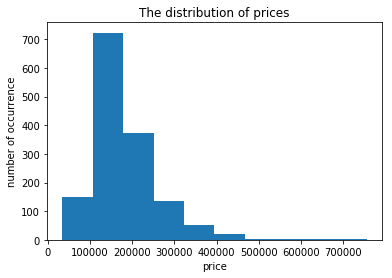

In [6]:
plt.hist(df.SalePrice)
plt.title("The distribution of prices")
plt.xlabel("price")
plt.ylabel("number of occurrence")

In [16]:
# creating the total sq ft as a feature enginering process

df['flSF'] = df['1stFlrSF'] + df['2ndFlrSF']

In [23]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['SaleCondition']= label_encoder.fit_transform(df['SaleCondition']) 
#df['LotArea']= label_encoder.fit_transform(df['LotArea']) 
df['BedroomAbvGr']= label_encoder.fit_transform(df['BedroomAbvGr']) 


array([3, 4, 1, 2, 0, 5, 6, 7])

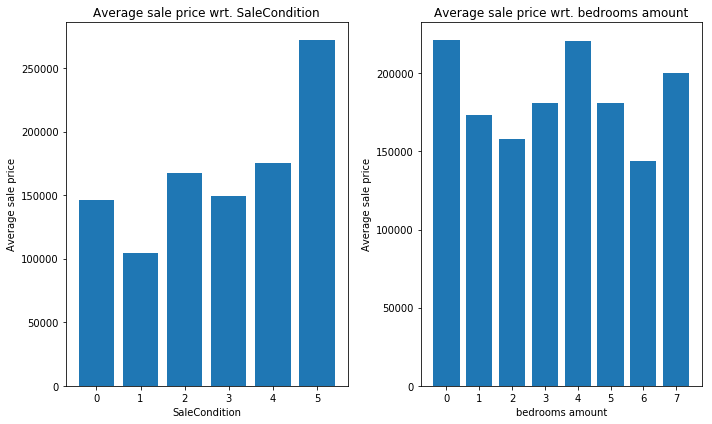

In [28]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(df.groupby("SaleCondition")["SalePrice"].mean().index, df.groupby("SaleCondition")["SalePrice"].mean(),
      )
plt.title("Average sale price wrt. SaleCondition")
plt.ylabel("Average sale price")
plt.xlabel("SaleCondition")


plt.subplot(1,2,2)
plt.bar(df.groupby("BedroomAbvGr")["SalePrice"].mean().index, df.groupby("BedroomAbvGr")["SalePrice"].mean(),
     )
plt.title("Average sale price wrt. bedrooms amount")
plt.ylabel("Average sale price")
plt.xlabel("bedrooms amount")


plt.tight_layout()
plt.show()


In [30]:
# Y is the target variable
Y = df['SalePrice']
# X is the feature set which includes
# is_male and is_smoker variables
X = df[['SaleCondition','BedroomAbvGr', 'LotArea', 'flSF']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [  9430.11748276 -27045.54869209     46.09135671    117.05103411]

Intercept: 
 23486.190756036463


SalePrice = 23486.19 + 9430.11 SaleCondition - 27045.54 BedroomAbvGr + 46.09 LotArea + 117.05 flSF 

In [31]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     571.3
Date:                Sat, 10 Aug 2019   Prob (F-statistic):          2.26e-296
Time:                        22:28:10   Log-Likelihood:                -17855.
No. Observations:                1460   AIC:                         3.572e+04
Df Residuals:                    1455   BIC:                         3.575e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.349e+04   6663.615      3.525      0.000    1.04e+04    3.66e+04
SaleCondition  9430.1175   1188.043      7.938      0.000    7099.657    1.18e+04
BedroomAbvGr  -2.705e+04   1877.621    -14.404      0.000   -3.07e+04   -2.34e+04
LotArea          46.0914      4.877      9.450      0.000      36.524      55.659
flSF            117.0510      3.155     37.103      0.000     110.863     123.239
==============================================================================
Omnibus:                      389.144   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14041.732
Skew:                          -0.522   Prob(JB):                         0.00
Kurtosis:                      18.157   Cond. No.                     8.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""